# Company Interlock workflow

In [135]:
import pandas as pd
import numpy as np

In [136]:
import pandas as pd
import numpy as np
from itertools import combinations

In [137]:
file_path = "../2.Initial_Graph_Building/boardex_us_companies_full_data_2022_2024.csv"

boardex_data = pd.read_csv(file_path, index_col = 0)

# Display the first few rows of the data to understand its structure
boardex_data.head()

,associationtype,boardname,companyname,directorname,overlapyearstart,overlapyearend,role,associatedrole,conncompanyorgtype,boardid,...,roletitle,roleboardposition,roleedflag,overlapyearstart_int,overlapyearend_int,startcompanydatestartrole,startcompanydateendrole,conncompanydatestartrole,conncompanydateendrole,orgtype
0,Unlisted Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,Gladius Pharmaceuticals Inc,Doctor Steve Gilman,2020,Curr,Independent Director (Brd) (SD),Scientific Advisor (Non-Brd),Private,401.0,...,Independent Director,Brd,SD,2020,NaN,2015-01-06,NaN,NaN,NaN,Quoted
1,Unlisted Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,ContraFect Corp,Doctor Steve Gilman,2023,Curr,Independent Director (Brd) (SD),Independent Vice Chairman (Brd) (SD),Private,401.0,...,Independent Director,Brd,SD,2023,NaN,2015-01-06,NaN,2023-11-09,NaN,Quoted
2,Other,VERICEL CORP (Aastrom Biosciences Inc prior to...,Northeastern University,Doctor Steve Gilman,2016,Curr,Independent Director (Brd) (SD),Advisory Board Member,Universities,401.0,...,Independent Director,Brd,SD,2016,NaN,2015-01-06,NaN,NaN,NaN,Quoted
3,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,AKEBIA THERAPEUTICS INC,Doctor Steve Gilman,2018,Curr,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,401.0,...,Independent Director,Brd,SD,2018,NaN,2015-01-06,NaN,2018-12-12,NaN,Quoted
4,Listed Org,VERICEL CORP (Aastrom Biosciences Inc prior to...,SCYNEXIS INC,Doctor Steve Gilman,2015,Curr,Independent Director (Brd) (SD),Independent Director (Brd) (SD),Quoted,401.0,...,Independent Director,Brd,SD,2015,NaN,2015-01-06,NaN,2015-02-25,NaN,Quoted


In [138]:
boardex_data.columns

Index(['associationtype', 'boardname', 'companyname', 'directorname',
       'overlapyearstart', 'overlapyearend', 'role', 'associatedrole',
       'conncompanyorgtype', 'boardid', 'companyid', 'directorid', 'roletitle',
       'roleboardposition', 'roleedflag', 'overlapyearstart_int',
       'overlapyearend_int', 'startcompanydatestartrole',
       'startcompanydateendrole', 'conncompanydatestartrole',
       'conncompanydateendrole', 'orgtype'],
      dtype='object')

Watch out for the column details here that's it

In [139]:
filtered_data = boardex_data[['boardid', 'companyid', 'directorid', 'overlapyearstart', 'overlapyearend' ]].drop_duplicates()

In [140]:
filtered_data['overlapyearend'].replace("Curr", 2024)
filtered_data['overlapyearend'] = pd.to_numeric(filtered_data['overlapyearend'], errors='coerce')

In [141]:
year = 2022

In [142]:
graph_simplified_df = filtered_data[ (year >= filtered_data['overlapyearstart']) & (year <= filtered_data['overlapyearend'])]

In [143]:
graph_simplified_df.columns

Index(['boardid', 'companyid', 'directorid', 'overlapyearstart',
       'overlapyearend'],
      dtype='object')

In [144]:
# # Assuming graph_simplified_df is already loaded
# # Step 1: Create a sorted unique company identifier
# graph_simplified_df['company_pair'] = graph_simplified_df.apply(
#     lambda row: '-'.join(sorted([str(row['boardid']), str(row['companyid'])])),
#     axis=1
# )  # 2-3 and 3-2 should be equivalent in graph_simplified_df['company']

# # Ensure data uniqueness per director per company to avoid inflated pair counts
# graph_simplified_df = graph_simplified_df.drop_duplicates(subset=['company_pair', 'directorid'])

# # Step 2 & 3: Create combinations of directors for each company, only if there are at least two directors
# director_pairs = graph_simplified_df.groupby('company_pair')['directorid'].apply(
#     lambda x: pd.DataFrame(combinations(x.unique(), 2), columns=['Director1', 'Director2']) if len(x) > 1 else pd.DataFrame(columns=['Director1', 'Director2'])
# ).reset_index(drop=True)

# # Step 4: Count occurrences of each pair
# director_pairs = director_pairs.groupby(['Director1', 'Director2']).size().reset_index(name='weight')

# # Step 5: Create the adjacency matrix
# if not director_pairs.empty:
#     directors = np.unique(director_pairs[['Director1', 'Director2']])
#     adj_matrix = pd.DataFrame(np.zeros((len(directors), len(directors))), columns=directors, index=directors)

#     # Populate the adjacency matrix
#     for index, row in director_pairs.iterrows():
#         adj_matrix.at[row['Director1'], row['Director2']] = row['weight']
#         adj_matrix.at[row['Director2'], row['Director1']] = row['weight']

#     # Ensure no self-loops
#     np.fill_diagonal(adj_matrix.values, 0)

#     print(adj_matrix)
# else:
#     print("No director pairs were found to have shared companies.")

In [145]:
import pandas as pd
import numpy as np
from itertools import combinations

# Assuming graph_simplified_df is already loaded
# Step 1: Create a sorted unique company identifier
graph_simplified_df['company_pair'] = graph_simplified_df.apply(
    lambda row: '-'.join(sorted([str(row['boardid']), str(row['companyid'])])),
    axis=1
)  # 2-3 and 3-2 should be equivalent in graph_simplified_df['company']

# Ensure data uniqueness per director per company to avoid inflated pair counts
graph_simplified_df = graph_simplified_df.drop_duplicates(subset=['company_pair', 'directorid'])

# Step 2 & 3: Create combinations of directors for each company, only if there are at least two directors
director_pairs = graph_simplified_df.groupby('company_pair')['directorid'].apply(
    lambda x: pd.DataFrame(combinations(x.unique(), 2), columns=['Director1', 'Director2']) if len(x) > 1 else pd.DataFrame(columns=['Director1', 'Director2'])
).reset_index(drop=True)

# Step 4: Create a DataFrame of unique director pairs without counting occurrences
director_pairs = director_pairs.drop_duplicates().reset_index(drop=True)

# Step 5: Create the adjacency matrix
if not director_pairs.empty:
    directors = np.unique(director_pairs[['Director1', 'Director2']])
    adj_matrix = pd.DataFrame(0, index=directors, columns=directors, dtype=int)

    # Populate the adjacency matrix
    for _, row in director_pairs.iterrows():
        adj_matrix.at[row['Director1'], row['Director2']] = 1
        adj_matrix.at[row['Director2'], row['Director1']] = 1

    # Ensure no self-loops
    np.fill_diagonal(adj_matrix.values, 0)

    print(adj_matrix)
else:
    print("No director pairs were found to have shared companies.")


/tmp/ipykernel_33932/2695135911.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_simplified_df['company_pair'] = graph_simplified_df.apply(


KeyboardInterrupt: 

In [ ]:
# # interestingly it is not actually that big so can run this easily.

# adj_matrix.to_csv("test_company_interlock_2024.csv")

We can see that the results are very sparse as seen here. Try the companies result here as well.

In [ ]:
import networkx as nx

In [167]:
G = nx.from_pandas_adjacency(adj_matrix)
print(G)

Graph with 1694 nodes and 4611 edges


In [ ]:
weights = [G[u][v]['weight'] for u, v in G.edges()]

In [ ]:
max(weights) # 5 common directors so this is fine.

1

In [ ]:
# only 0 and 1 so this is working!!

In [ ]:
# import matplotlib.pyplot as plt

# # Histogram of the weights
# plt.figure(figsize=(10, 5))
# plt.hist(weights, bins=50, alpha=0.75, color='blue')
# plt.title('Distribution of Edge Weights')
# plt.xlabel('Weight')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

Removing the loss connection ones could be meaningful here, for workflow.

Maybe combine the results together, but just go with the binary approach here to see what could be useful.

Have a discussion here for next steps.

## Code analysis of approach

To get and everything that is required.

In [166]:
density = nx.density(G)
print("Density of the graph:", density)

Density of the graph: 0.003215546200027755


In [ ]:
clustering = nx.clustering(G)
print("Local clustering for each node:", clustering)


 # id details for each for director for this.

Local clustering for each node: {1766630.0: 1.0, 2777534.0: 0, 2714293.0: 1.0, 2709167.0: 1.0, 2709141.0: 1.0, 2704494.0: 0, 2696974.0: 1.0, 2677118.0: 1.0, 2676912.0: 0, 2674003.0: 1.0, 2665052.0: 0, 2661439.0: 1.0, 2661434.0: 1.0, 2653034.0: 0, 2650351.0: 1.0, 2650053.0: 1.0, 2648730.0: 0, 2644965.0: 0, 2643505.0: 1.0, 2634138.0: 0, 2633729.0: 0, 2633206.0: 1.0, 2629306.0: 1.0, 2629222.0: 0, 2629065.0: 0, 2628446.0: 0, 2627537.0: 1.0, 2626780.0: 1.0, 2626529.0: 1.0, 2622972.0: 0, 2622883.0: 1.0, 2622702.0: 0, 2620940.0: 1.0, 2620529.0: 1.0, 2620522.0: 1.0, 2617974.0: 0, 2617064.0: 1.0, 2616791.0: 1.0, 2616433.0: 0, 2615804.0: 0, 2613472.0: 0, 2612055.0: 0, 2611903.0: 1.0, 2611877.0: 1.0, 2610777.0: 1.0, 2610775.0: 1.0, 2603544.0: 0, 2601837.0: 0, 2600553.0: 1.0, 2599896.0: 1.0, 2599062.0: 1.0, 2598979.0: 0.6, 2598358.0: 0, 2598272.0: 0.7941176470588235, 2597359.0: 1.0, 2596748.0: 0, 2596381.0: 1.0, 2596340.0: 1.0, 2596337.0: 1.0, 2592670.0: 0, 2589751.0: 1.0, 2586654.0: 0, 2583928.0:

In [ ]:
degree_centrality = nx.degree_centrality(G)
print("Degree centrality for each node:", degree_centrality)


Degree centrality for each node: {1766630.0: 0.013585351447135262, 2777534.0: 0.0005906674542232723, 2714293.0: 0.002362669816893089, 2709167.0: 0.011222681630242173, 2709141.0: 0.011222681630242173, 2704494.0: 0.0005906674542232723, 2696974.0: 0.005906674542232723, 2677118.0: 0.00767867690490254, 2676912.0: 0.0005906674542232723, 2674003.0: 0.011222681630242173, 2665052.0: 0.0011813349084465446, 2661439.0: 0.0029533372711163615, 2661434.0: 0.0029533372711163615, 2653034.0: 0.0005906674542232723, 2650351.0: 0.0035440047253396337, 2650053.0: 0.0011813349084465446, 2648730.0: 0.0011813349084465446, 2644965.0: 0.0005906674542232723, 2643505.0: 0.011222681630242173, 2634138.0: 0.0005906674542232723, 2633729.0: 0.0005906674542232723, 2633206.0: 0.002362669816893089, 2629306.0: 0.01004134672179563, 2629222.0: 0.0005906674542232723, 2629065.0: 0.0005906674542232723, 2628446.0: 0.0005906674542232723, 2627537.0: 0.013585351447135262, 2626780.0: 0.002362669816893089, 2626529.0: 0.015357353809805

In [ ]:
# more costly to run - this is quite costly as with community detection approaches

betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness centrality for each node:", betweenness_centrality)


Betweenness centrality for each node: {1766630.0: 0.0, 2777534.0: 0.0, 2714293.0: 0.0, 2709167.0: 0.0, 2709141.0: 0.0, 2704494.0: 0.0, 2696974.0: 0.0, 2677118.0: 0.0, 2676912.0: 0.0, 2674003.0: 0.0, 2665052.0: 0.00028974821927028134, 2661439.0: 0.0, 2661434.0: 0.0, 2653034.0: 0.0, 2650351.0: 0.0, 2650053.0: 0.0, 2648730.0: 6.981884801693526e-07, 2644965.0: 0.0, 2643505.0: 0.0, 2634138.0: 0.0, 2633729.0: 0.0, 2633206.0: 0.0, 2629306.0: 0.0, 2629222.0: 0.0, 2629065.0: 0.0, 2628446.0: 0.0, 2627537.0: 0.0, 2626780.0: 0.0, 2626529.0: 0.0, 2622972.0: 0.0, 2622883.0: 0.0, 2622702.0: 0.0, 2620940.0: 0.0, 2620529.0: 0.0, 2620522.0: 0.0, 2617974.0: 0.0, 2617064.0: 0.0, 2616791.0: 0.0, 2616433.0: 0.0, 2615804.0: 0.0, 2613472.0: 0.0, 2612055.0: 0.0, 2611903.0: 0.0, 2611877.0: 0.0, 2610777.0: 0.0, 2610775.0: 0.0, 2603544.0: 0.0, 2601837.0: 0.0, 2600553.0: 0.0, 2599896.0: 0.0, 2599062.0: 0.0, 2598979.0: 4.189130881016116e-06, 2598358.0: 0.0, 2598272.0: 1.3731040109997268e-05, 2597359.0: 0.0, 2596748

### Community detection workflow

In [146]:
import matplotlib.pyplot as plt

In [150]:
communities = nx.community.louvain_communities(G, seed=123) # actually these are quite fast with these - but can use gpu to speed up the process

# e.g. 

# [{0, 4, 5, 7, 9}, {1, 2, 3, 6, 8}]

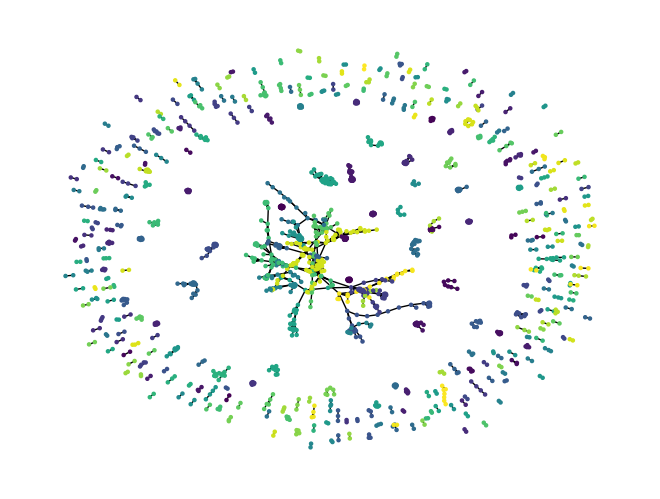

In [156]:
cmap = plt.get_cmap('viridis') 

# Generate as many colors as there are communities
colors = [cmap(i / len(communities)) for i in range(len(communities))]

# Create a color map for communities
color_map = []
for node in G:
    for idx, community in enumerate(communities):
        if node in community:
            color_map.append(colors[idx])
            break

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, node_color=color_map, with_labels=False, node_size=5, font_weight='bold')

# Show the plot
plt.show()

In [158]:
len(colors) # 346 different communities with this - to get it local communities for workflow

# maybe change the colour map as needed for this

# communities are created by nodes as are other approaches here so it is not surprising.

346

Differences between clusters and communities?

### Alternatively check SVD approach with number of communities for detection

Find alternative way with SVD as seen before.

Chat: https://chatgpt.com/share/6429af02-2f9c-4b46-8e1c-5e3c6674c0fe

In [159]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering


In [168]:
# Get the adjacency matrix in numpy array form
A = nx.to_numpy_array(G)

# Number of clusters
n_clusters = 4

# Perform Spectral Clustering
sc = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', n_init=100)
labels = sc.fit_predict(A)

/home/bingfeng93/miniconda3/envs/bayesian/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:301: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [172]:
A.shape

(1694, 1694)

In [173]:
labels.shape

(1694,)

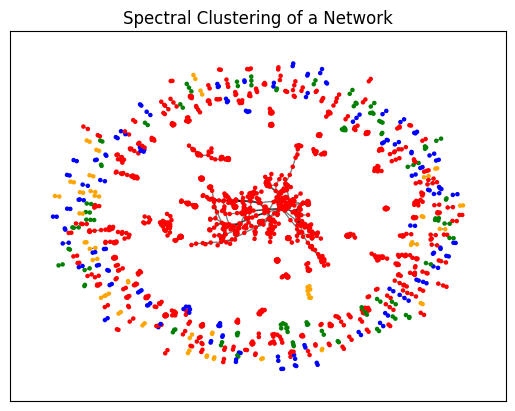

In [176]:
colors = ['red', 'green', 'blue', "orange"] # change colour to get the size from cmap that's it!!
node_colors = [colors[label] for label in sc.labels_]

# Step 4: Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=5)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Spectral Clustering of a Network')
plt.show()

# could be useful here for later - not that useful - central appraoch - more sophisticated clustering needed,.

## Visualise the graph

use for visualisation of the dynamic graph structure across time

In [ ]:
# code is simpler

In [ ]:
import matplotlib.pyplot as plt

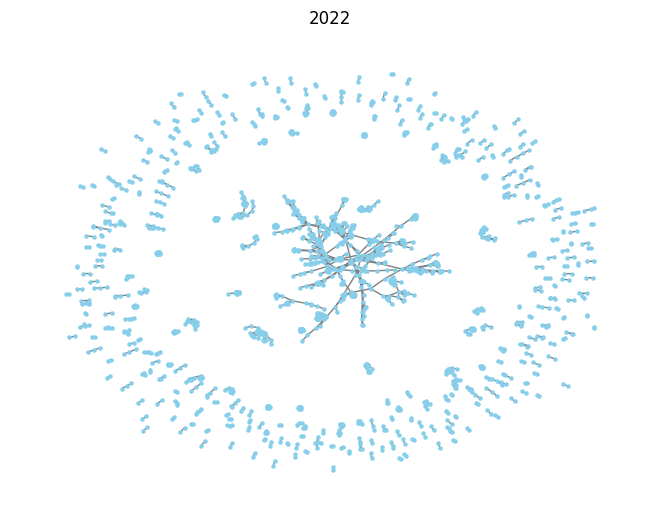

In [ ]:
# Position nodes using the spring layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=False, #with_labels=True, 
        node_color='skyblue', edge_color='gray', node_size=5, font_size=10)

# Show the plot
plt.title("2022")
plt.show()

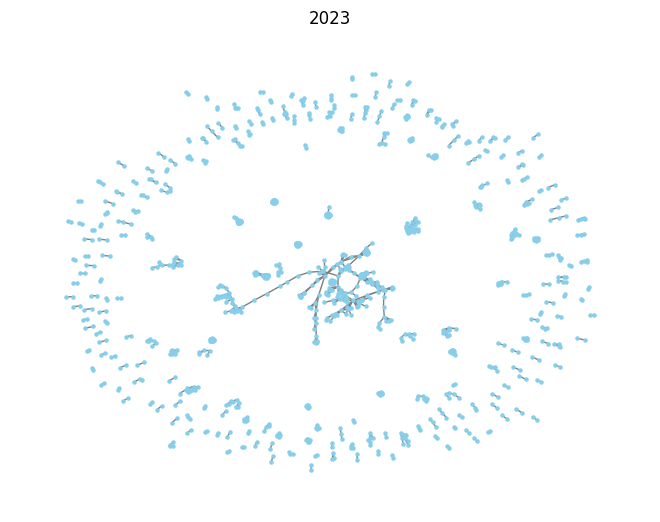

In [ ]:
# Position nodes using the spring layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=False, #with_labels=True, 
        node_color='skyblue', edge_color='gray', node_size=5, font_size=10)

# Show the plot
plt.title("2023")
plt.show()

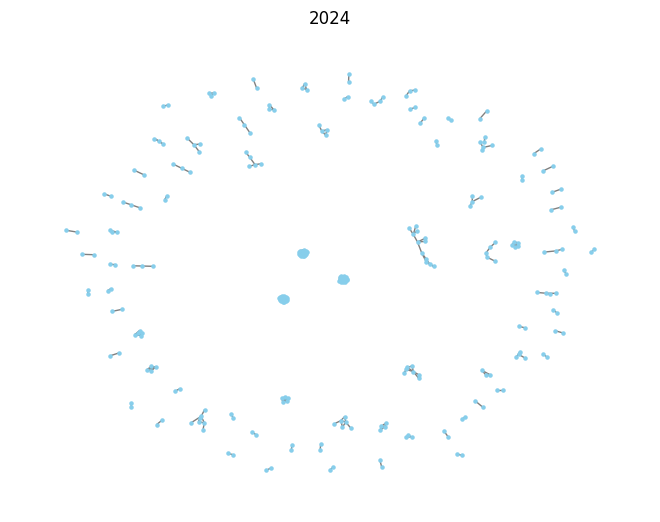

In [ ]:
# Position nodes using the spring layout
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=False, #with_labels=True, 
        node_color='skyblue', edge_color='gray', node_size=5, font_size=10)

# Show the plot
plt.title("2024")
plt.show()

Convert the code together for workflow later